# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [53]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [17]:
data = pd.read_csv('weight-height.csv')
male_df =  data[data.Gender == 'Male']
female_df =  data[data.Gender == 'Female']

data.groupby('Gender').agg(['mean', 'std'])

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Height                Weight           
             mean       std        mean        std
Gender                                            
Female  63.708774  2.696284  135.860093  19.022468
Male    69.026346  2.863362  187.020621  19.781155

## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

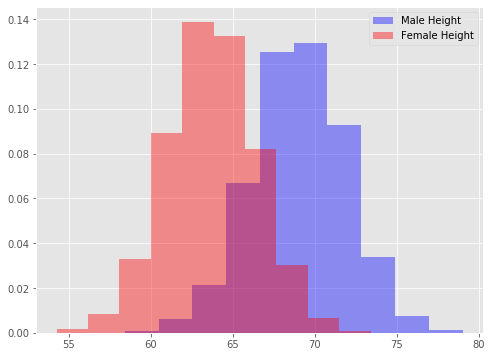

In [34]:
# Your code here
plt.figure(figsize=(8,6))
male_df.Height.hist(bins=10, density=True, alpha=0.4, color='blue', label='Male Height')
female_df.Height.hist(bins=10, density=True, alpha=0.4, color='red', label='Female Height')
plt.legend()
plt.show()

In [32]:
# Record your observations - are these inline with your personal observations?
# Yes.
# 1. The men have higher probbality to have larger heights.
# 2. Female have peak probability around 62 inches.
# 3. Male have peak probablity around 69 inches.
# 4. The male normal distribution is wider, which mean male have larger range of heights.

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

In [42]:
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
n, bins = np.histogram(s, 20, density=1)
n, bins

(array([0.37803902, 0.        , 0.        , 0.37803902, 0.37803902,
        1.13411706, 0.75607804, 2.26823413, 4.53646825, 5.67058532,
        4.91450728, 3.40235119, 2.64627315, 3.40235119, 1.89019511,
        2.64627315, 1.51215608, 0.75607804, 0.37803902, 0.75607804]),
 array([-0.2859688 , -0.2595165 , -0.23306421, -0.20661191, -0.18015961,
        -0.15370732, -0.12725502, -0.10080273, -0.07435043, -0.04789813,
        -0.02144584,  0.00500646,  0.03145875,  0.05791105,  0.08436334,
         0.11081564,  0.13726794,  0.16372023,  0.19017253,  0.21662482,
         0.24307712]))

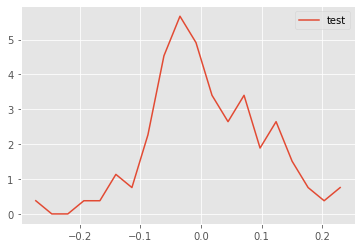

In [43]:
def density(x):
    
    n, bins = np.histogram(x, 20, density=1)
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

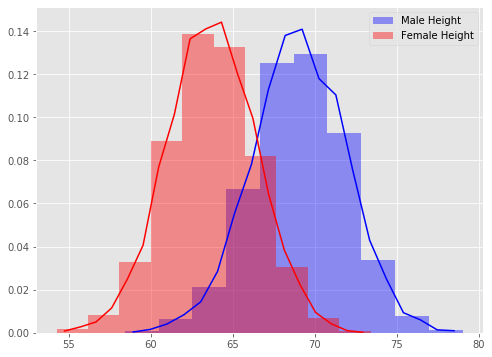

In [50]:
# Your code here 
plt.figure(figsize=(8,6))
male_df.Height.hist(bins=10, density=True, alpha=0.4, color='blue', label='Male Height')
female_df.Height.hist(bins=10, density=True, alpha=0.4, color='red', label='Female Height')

x_m, y_m = density(male_df.Height)
plt.plot(x_m, y_m, color='blue')

x_f, y_f = density(female_df.Height)
plt.plot(x_f, y_f, color='red')

plt.legend()
plt.show()

## Repeat the above exercise for male and female weights

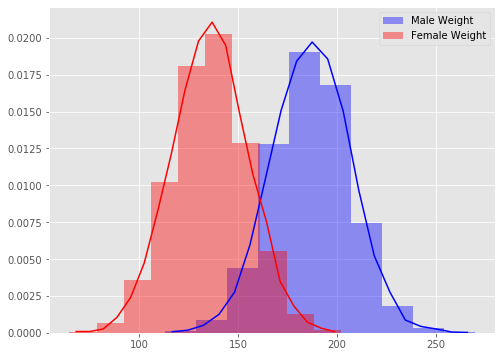

In [51]:
# Your code here
plt.figure(figsize=(8,6))
male_df.Weight.hist(bins=10, density=True, alpha=0.4, color='blue', label='Male Weight')
female_df.Weight.hist(bins=10, density=True, alpha=0.4, color='red', label='Female Weight')

x_m, y_m = density(male_df.Weight)
plt.plot(x_m, y_m, color='blue')

x_f, y_f = density(female_df.Weight)
plt.plot(x_f, y_f, color='red')

plt.legend()
plt.show()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?
# The men are more likely to have weight around 180 lb, and women around 140 lb.
# The distribution is a bit wider for man.

# What is the takeaway when comparing male and female heights and weights?
#The weight distribution seperates the men and women better than height distribution

## Repeat the above experiments in seaborn and compare with your results

In [55]:
import seaborn as sns

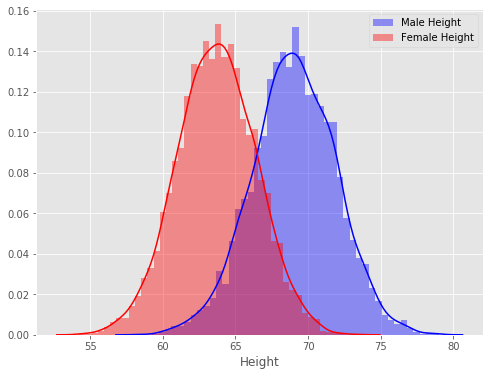

In [64]:
# Code for heights here
plt.figure(figsize=(8,6))
sns.distplot(male_df.Height, color='blue', label='Male Height')
sns.distplot(female_df.Height, color='red', label='Female Height')
plt.legend()

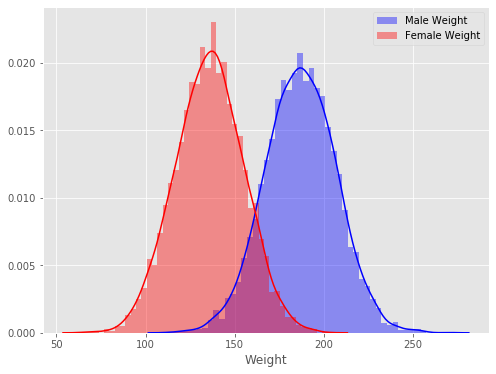

In [65]:
# Code for weights here
plt.figure(figsize=(8,6))
sns.distplot(male_df.Weight, color='blue', label='Male Weight')
sns.distplot(female_df.Weight, color='red', label='Female Weight')
plt.legend()

In [66]:
# Your comments on the two approaches here. 
# sns method is shorter.

# are they similar? what makes them different if they are?
# They look very similar.

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.